# Amazon Stock Data-Set with time series analysis

##### Here the link of the data-set is--
https://www.kaggle.com/datasets/salmanfaroz/amazon-stock-price-1997-to-2020 <br>
Here we choose the opening column as our time series response variable.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [ ]:
D = pd.read_csv("Amazon.csv")
D.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [ ]:
from pandas.core.tools.datetimes import to_datetime

D["Date"] = to_datetime(D["Date"],format  = "%Y-%m-%d",utc = True)
D = D.set_index(D["Date"])
Data = pd.DataFrame(D.loc[:,("Open")])
Data.head()

,Open
Date,
1997-05-15 00:00:00+00:00,2.437500
1997-05-16 00:00:00+00:00,1.968750
1997-05-19 00:00:00+00:00,1.760417
1997-05-20 00:00:00+00:00,1.729167
1997-05-21 00:00:00+00:00,1.635417


# Plotting the data--

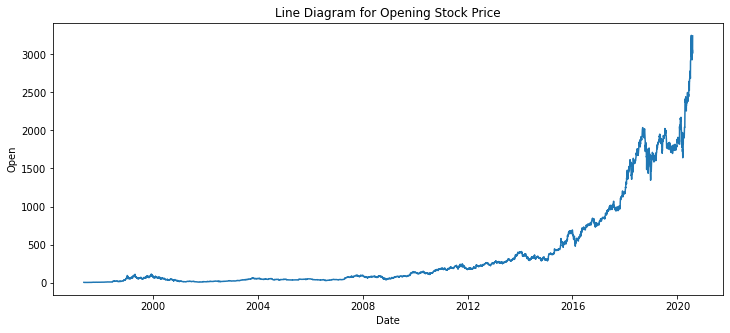

In [ ]:
plt.figure(figsize = (12,5))
plt.plot(Data)
plt.xlabel("Date")
plt.ylabel("Open")
plt.title("Line Diagram for Opening Stock Price")
plt.show()

##### So, let us split our data into train and test component as
train data = First 80% of the total data <br>
test data = Remaing 20% observations

In [ ]:
l = 5800
data_train = Data.iloc[1:l,:]
len(data_train)

5799

In [ ]:

data_test = Data.iloc[l:,:]
len(data_test)

42

#Plotting the training and test data together 

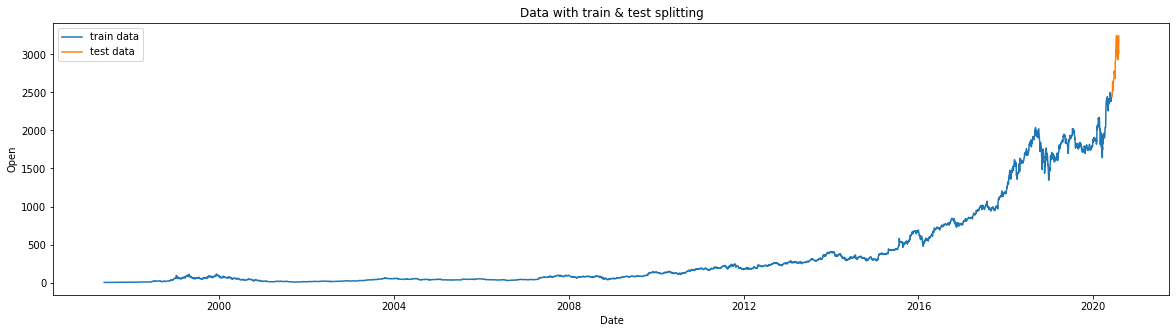

In [ ]:
plt.figure(figsize = (20,5))
plt.plot(data_train,label = "train data")
plt.plot(data_test,label = "test data")
plt.xlabel("Date")
plt.ylabel("Open")
plt.title("Data with train & test splitting")
plt.legend()
plt.show()

# Testing for trend

In [ ]:
import numpy as np

def Rel_Or_Test(x):
    count = 0
    for i in np.arange(len(x)):
        for j in np.arange((i+1),len(x)):
            if x[i] > x[j]:
                count  += 1
    return count


In [ ]:
Q = Rel_Or_Test(Data.Open)

In [ ]:
tau = 1-(4*Q/(len(Data.Open)*(len(Data.Open)-1)))
tau

0.8173163639598979

In [ ]:
import math
Z = (tau - 0)/math.sqrt((2*len(Data.Open))/(9*len(Data.Open)*(len(Data.Open)-1)))
Z

132.5073761220483

In [ ]:
import scipy.stats as spt
if np.abs(Z)>spt.norm.ppf(0.05,0,1):
  print("The Null Hypothesis is rejected....So trend is present")
else:
  print("The Null Hypothesis is accepted....so trend is not presented")



The Null Hypothesis is rejected....So trend is present


# Estimating Trend

In [ ]:
l = np.array(Data)
l

array([[2.43750000e+00],
       [1.96875000e+00],
       [1.76041663e+00],
       ...,
       [3.03098999e+03],
       [3.01400000e+03],
       [3.24400000e+03]])

In [ ]:
log = np.log(l)
pd.DataFrame(log).head(100)

,0
0,0.890973
1,0.677399
2,0.565551
3,0.547640
4,0.491898
...,...
95,1.386294
96,1.490091
97,1.396657
98,1.406914


In [ ]:
delta1 = np.zeros(len(l)).reshape(-1,1)
for i in np.arange(1,len(l)):
  delta1[i-1] = log[i] - log[i-1]
delta1[len(delta1)-1] = delta1[len(delta1) - 2]
delta1

delta2 = np.zeros(len(l)).reshape(-1,1)
for i in np.arange(1,len(l)):
  delta2[i-1] = delta1[i] - delta1[i-1]
delta2[len(delta2)-1] = delta2[len(delta2) - 2]
delta2

delta3 = np.zeros(len(l)).reshape(-1,1)
for i in np.arange(1,len(l)):
  delta3[i-1] = delta2[i] - delta2[i-1]
delta3[len(delta3)-1] = delta2[len(delta3) - 2]
delta3

array([[-0.00778838],
       [-0.13176845],
       [-0.03541905],
       ...,
       [-0.07916023],
       [ 0.        ],
       [ 0.        ]])

In [ ]:
Data["log"] = log
Data["Delta1"] = delta1
Data["Delta2"] = delta2
Data

,Open,log,Delta1,Delta2
Date,,,,
1997-05-15 00:00:00+00:00,2.437500,0.890973,-0.213574,0.101726
1997-05-16 00:00:00+00:00,1.968750,0.677399,-0.111848,0.093937
1997-05-19 00:00:00+00:00,1.760417,0.565551,-0.017911,-0.037831
1997-05-20 00:00:00+00:00,1.729167,0.547640,-0.055742,-0.073250
1997-05-21 00:00:00+00:00,1.635417,0.491898,-0.128992,0.107013
...,...,...,...,...
2020-07-27 00:00:00+00:00,3062.000000,8.026824,-0.002528,-0.005124
2020-07-28 00:00:00+00:00,3054.270020,8.024296,-0.007651,0.002030
2020-07-29 00:00:00+00:00,3030.989990,8.016645,-0.005621,0.079160


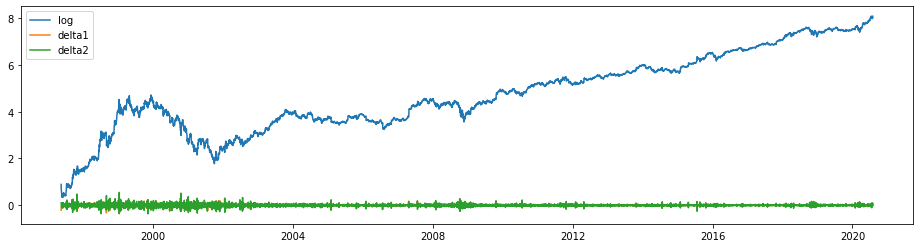

In [ ]:
plt.figure(figsize = (16,4))
plt.plot(Data.log,data = Data,label = "log")
plt.plot(Data.Delta1,data = Data,label = "delta1")
plt.plot(Data.Delta2,data = Data,label = "delta2")
plt.legend()
plt.show()

In [ ]:
Q = Rel_Or_Test(log)

In [ ]:
tau = 1-(4*Q/(len(Data.Open)*(len(Data.Open)-1)))
tau

0.8173163639598979

In [ ]:
import math
Z = (tau - 0)/math.sqrt((2*len(Data.Open))/(9*len(Data.Open)*(len(Data.Open)-1)))
Z

132.5073761220483

In [ ]:
import scipy.stats as spt
if np.abs(Z)>spt.norm.ppf(0.95,0,1):
  print ("The Null Hypothesis is rejected....So trend is present")
else:
  print ("The Null Hypothesis is accepted....so trend is not presented")

The Null Hypothesis is rejected....So trend is present


In [ ]:
Q = Rel_Or_Test(Data.Delta1)

In [ ]:
tau = 1-(4*Q/(len(Data.Open)*(len(Data.Open)-1)))
tau

0.01406934570640983

In [ ]:
import math
Z = (tau - 0)/math.sqrt((2*len(Data.Open))/(9*len(Data.Open)*(len(Data.Open)-1)))
Z

2.280991994676183

In [ ]:
import scipy.stats as spt
if Z>spt.norm.ppf(0.95,0,1):
    print ("The Null Hypothesis is rejected....So trend is present")
else:
    print ("The Null Hypothesis is accepted....so trend is not presented")

The Null Hypothesis is rejected....So trend is present


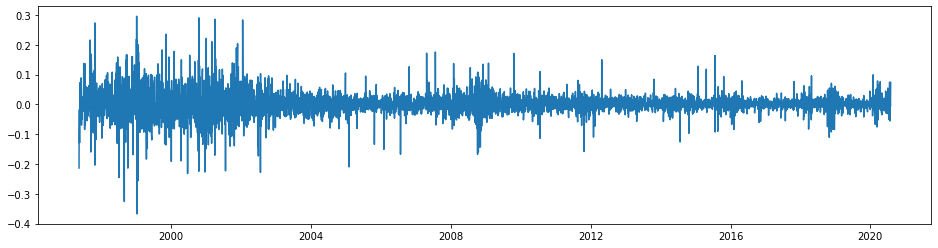

In [ ]:
plt.figure(figsize = (16,4))
plt.plot(Data.Delta1,data = Data)
plt.show()

In [ ]:
Q = Rel_Or_Test(Data.Delta2)

In [ ]:
tau = 1-(4*Q/(len(Data.Open)*(len(Data.Open)-1)))
tau

-0.0008162793545092306

In [ ]:
import math
Z = (tau - 0)/math.sqrt((2*len(Data.Open))/(9*len(Data.Open)*(len(Data.Open)-1)))
print(Z)

-0.1323392510148304


In [ ]:
spt.norm.ppf(0.95,0,1)


1.6448536269514722

In [ ]:
import scipy.stats as spt
if np.abs(Z)>spt.norm.ppf(0.95,0,1):
  print("The Null Hypothesis is rejected....So trend is present")
else:
  print("The Null Hypothesis is accepted....so trend is not presented")

The Null Hypothesis is accepted....so trend is not presented


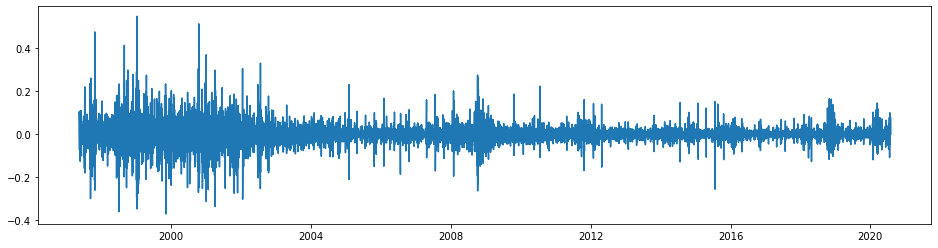

In [ ]:
plt.figure(figsize = (16,4))
plt.plot(Data.Delta2,data = Data)
plt.show()

# Checking for Seasonality

In [ ]:
sr = pd.Series(Data.Delta2)
d_trend=pd.DataFrame(sr)
d_trend

,Delta2
Date,
1997-05-15 00:00:00+00:00,0.101726
1997-05-16 00:00:00+00:00,0.093937
1997-05-19 00:00:00+00:00,-0.037831
1997-05-20 00:00:00+00:00,-0.073250
1997-05-21 00:00:00+00:00,0.107013
...,...
2020-07-27 00:00:00+00:00,-0.005124
2020-07-28 00:00:00+00:00,0.002030
2020-07-29 00:00:00+00:00,0.079160


In [ ]:
df_dtrend=pd.DataFrame()
lst=pd.DatetimeIndex(D['Date']).year.unique()
for i in range(len(lst)):
  df_dtrend[lst[i]]=""
lst1=[i for i in range(1,13)]
df_dtrend["Month"]=lst1
df_dtrend.set_index("Month",inplace=True)

In [ ]:
df=pd.DataFrame()

In [ ]:
lst=pd.DatetimeIndex(D['Date']).year.unique()
for i in range(len(lst)):
  df[lst[i]]=""
lst1=[i for i in range(1,13)]
df["Month"]=lst1
df.set_index("Month",inplace=True)
for i in df.columns:
  for j in range(1,13):
    sum=0
    for k in range(D.shape[0]):
      if pd.DatetimeIndex(D['Date'])[k].year==i and pd.DatetimeIndex(D['Date'])[k].month==j:
        sum=sum+Data["Delta2"][k]
    df[i][j]=sum


In [ ]:
for i in df.columns:
  for j in range(1,13):
    sum=0
    for k in range(d_trend.shape[0]):
      if pd.DatetimeIndex(D['Date'])[k].year==i and pd.DatetimeIndex(D['Date'])[k].month==j:
        sum=sum+d_trend['Delta2'][k]
    df_dtrend[i][j]=sum

In [ ]:
for i in df_dtrend.columns:
  df_dtrend[i] = df_dtrend[i].rank(axis = 0)

In [ ]:
df_dtrend["Mi"]=0.00
df_dtrend

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Mi
Month,,,,,,,,,,,,,,,,,,,,,
1,6.5,8.0,5.0,5.0,11.0,2.0,4.0,5.0,12.0,6.0,...,11.0,1.0,3.0,12.0,6.0,8.0,7.0,1.0,8.0,0.0
2,6.5,4.0,11.0,4.0,10.0,12.0,5.0,11.0,9.0,2.0,...,1.0,12.0,11.0,2.0,12.0,4.0,1.0,10.0,10.0,0.0
3,6.5,9.0,1.0,9.0,1.0,3.0,10.0,12.0,1.0,11.0,...,7.0,3.0,8.0,3.0,1.0,7.0,8.0,7.0,1.0,0.0
4,6.5,5.0,3.0,11.0,12.0,4.0,6.0,4.0,11.0,7.0,...,4.0,5.0,6.0,9.0,8.0,11.0,10.0,5.0,2.0,0.0
5,12.0,6.0,8.0,10.0,2.0,7.0,2.0,9.0,8.0,10.0,...,6.0,9.0,1.0,7.0,3.0,1.0,5.0,4.0,11.0,0.0
6,2.0,12.0,9.0,2.0,7.0,1.0,12.0,1.0,2.0,3.0,...,8.0,10.0,12.0,6.0,10.0,3.0,9.0,11.0,12.0,0.0
7,9.0,1.0,7.0,6.0,4.0,11.0,1.0,8.0,4.0,4.0,...,2.0,6.0,2.0,4.0,4.0,12.0,3.0,6.0,9.0,0.0
8,4.0,10.0,2.0,7.0,5.0,8.0,11.0,6.0,3.0,12.0,...,10.0,8.0,10.0,11.0,5.0,2.0,6.0,12.0,5.0,0.0
9,1.0,2.0,12.0,8.0,9.0,10.0,8.0,7.0,10.0,1.0,...,5.0,7.0,5.0,5.0,7.0,6.0,4.0,3.0,5.0,0.0


In [ ]:

for j in range(1,13):

  df_dtrend["Mi"][j]=df_dtrend.iloc[j-1,:].sum()

In [ ]:
df_dtrend

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Mi
Month,,,,,,,,,,,,,,,,,,,,,
1,6.5,8.0,5.0,5.0,11.0,2.0,4.0,5.0,12.0,6.0,...,11.0,1.0,3.0,12.0,6.0,8.0,7.0,1.0,8.0,136.5
2,6.5,4.0,11.0,4.0,10.0,12.0,5.0,11.0,9.0,2.0,...,1.0,12.0,11.0,2.0,12.0,4.0,1.0,10.0,10.0,167.5
3,6.5,9.0,1.0,9.0,1.0,3.0,10.0,12.0,1.0,11.0,...,7.0,3.0,8.0,3.0,1.0,7.0,8.0,7.0,1.0,151.5
4,6.5,5.0,3.0,11.0,12.0,4.0,6.0,4.0,11.0,7.0,...,4.0,5.0,6.0,9.0,8.0,11.0,10.0,5.0,2.0,162.5
5,12.0,6.0,8.0,10.0,2.0,7.0,2.0,9.0,8.0,10.0,...,6.0,9.0,1.0,7.0,3.0,1.0,5.0,4.0,11.0,148.0
6,2.0,12.0,9.0,2.0,7.0,1.0,12.0,1.0,2.0,3.0,...,8.0,10.0,12.0,6.0,10.0,3.0,9.0,11.0,12.0,172.0
7,9.0,1.0,7.0,6.0,4.0,11.0,1.0,8.0,4.0,4.0,...,2.0,6.0,2.0,4.0,4.0,12.0,3.0,6.0,9.0,125.0
8,4.0,10.0,2.0,7.0,5.0,8.0,11.0,6.0,3.0,12.0,...,10.0,8.0,10.0,11.0,5.0,2.0,6.0,12.0,5.0,175.0
9,1.0,2.0,12.0,8.0,9.0,10.0,8.0,7.0,10.0,1.0,...,5.0,7.0,5.0,5.0,7.0,6.0,4.0,3.0,5.0,135.0


In [ ]:
c=24
r=12
x=0
for i in range(1,13):
  x=x+((df_dtrend["Mi"][i]-c*(r+1)/2)**2)/(c*r*(1+r))


In [ ]:

test_stat=12*x
print(test_stat)
spt.chi2.ppf(1-.01, df=11)

13.983974358974358


24.724970311318277

In [ ]:
if test_stat>spt.chi2.ppf(1-.01, df=11):
    print ("The Null Hypothesis is rejected....So seasonality is present")
else:
    print ("The Null Hypothesis is accepted....so seasonality is not presented")

The Null Hypothesis is accepted....so seasonality is not presented


## Test for stationaity

In [ ]:
!pip install statsmodels

In [ ]:
## ADF test
from statsmodels.tsa.stattools import adfuller
series = pd.Series(d_trend.Delta2)
result = adfuller(series)
print(result[1])

0.0


In [ ]:
count = 0
for i in np.arange(2,len(series)-1):
  if (series[i] <series[(i-1)] and series[i] <series[(i+1)]) or (series[i] >series[(i-1)] and series[i] >series[(i+1)]):
    count +=1
count

4348

In [ ]:
n = len(series) - 2
P = (count - ((2/3)*(n-2)))/math.sqrt(((16*n)-29)/90)
P

14.154257320292194

In [ ]:
if P>spt.norm.ppf(0.975,0,1):
    print ("The Null Hypothesis is rejected....So the series is not random")
else:
    print ("The Null Hypothesis is accepted....So the series is random")

The Null Hypothesis is rejected....So the series is not random


In [ ]:
# Data["detrend"] = detrend
# Data = Data.drop("Open",axis = 1)
# Data

In [ ]:
l = 5800
data_train = d_trend.iloc[1:l,:]
np.shape(data_train)

(5799, 1)

In [ ]:
data_test = d_trend.iloc[l:,:]
np.shape(data_test)

(42, 1)

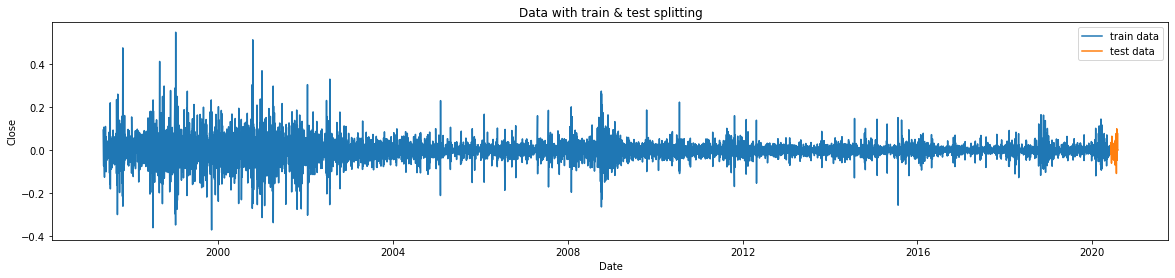

In [ ]:
from IPython.core.pylabtools import figsize
figsize(20,4)
plt.plot(data_train,label = "train data")
plt.plot(data_test,label = "test data")
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Data with train & test splitting")
plt.legend()
plt.show()

Now here auto correlation plotting

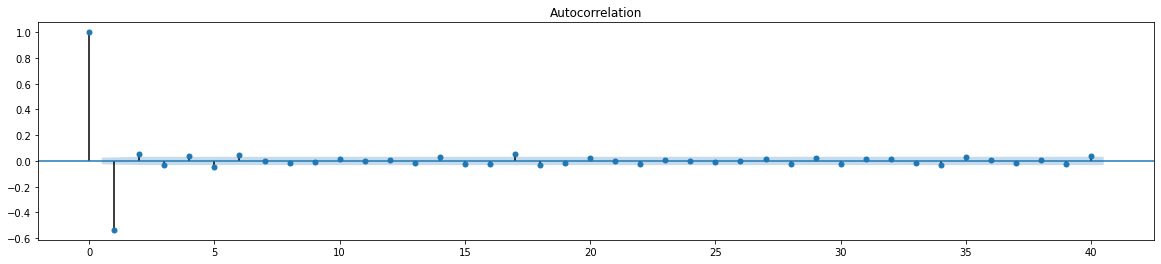

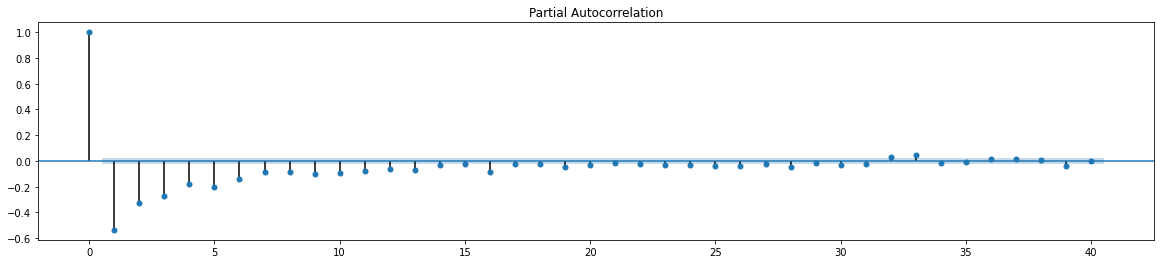

In [ ]:
import statsmodels.api as smp
smp.graphics.tsa.plot_acf(d_trend,lags =40 )
smp.graphics.tsa.plot_pacf(d_trend,lags =40 )
plt.show()

#Fitting of MA process


In [ ]:
l = 5800
data_train = d_trend.iloc[1:l,:]
data_test = d_trend.iloc[l:,:]
len(data_test)

42

In [ ]:
data_train

,Delta2
Date,
1997-05-16 00:00:00+00:00,0.093937
1997-05-19 00:00:00+00:00,-0.037831
1997-05-20 00:00:00+00:00,-0.073250
1997-05-21 00:00:00+00:00,0.107013
1997-05-22 00:00:00+00:00,0.093438
...,...
2020-05-27 00:00:00+00:00,0.021798
2020-05-28 00:00:00+00:00,0.000013
2020-05-29 00:00:00+00:00,-0.005451


In [ ]:
from statsmodels.tsa.arima_model import ARMA

MA_Model = ARMA(np.asarray(data_train),order = (0,1))
MA_fitted = MA_Model.fit()

print(MA_fitted.params)
# plt.legend()
# plt.show()

[-1.72979513e-07 -9.99946562e-01]


In [ ]:
MA_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 5799
Model:                     ARMA(0, 1)   Log Likelihood               10689.158
Method:                       css-mle   S.D. of innovations              0.038
Date:                Thu, 10 Nov 2022   AIC                         -21372.317
Time:                        21:41:11   BIC                         -21352.320
Sample:                             0   HQIC                        -21365.361
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.73e-07   3.02e-07     -0.573      0.567   -7.65e-07    4.19e-07
ma.L1.y       -0.9999      0.001  -1581.279      0.000      -1.001      -0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
MA_Predict = MA_fitted.predict(4676,d_trend.shape[0])
MA_Predict

array([ 3.05355441e-03, -2.36279054e-02,  1.76735951e-02, ...,
       -1.72979513e-07, -1.72979513e-07, -1.72979513e-07])

In [ ]:
l

5800

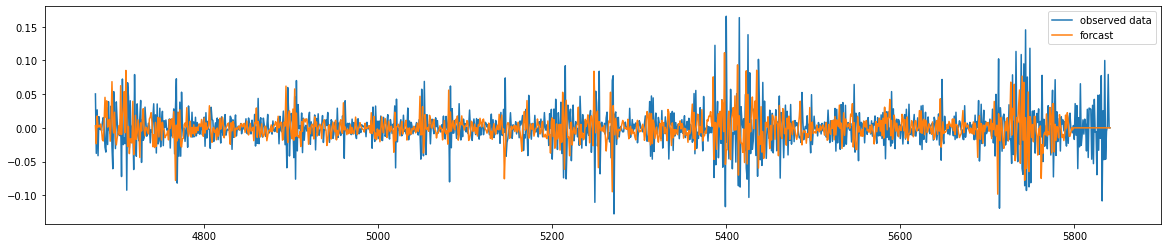

1167

In [ ]:

plt.plot(np.arange(4675,d_trend.shape[0]),d_trend["Delta2"][4675:d_trend.shape[0]+1],label = "observed data")
plt.plot(np.arange(4675,d_trend.shape[0]),MA_Predict,label = "forcast")
plt.legend()
plt.show()
len(np.arange(4675,d_trend.shape[0]))

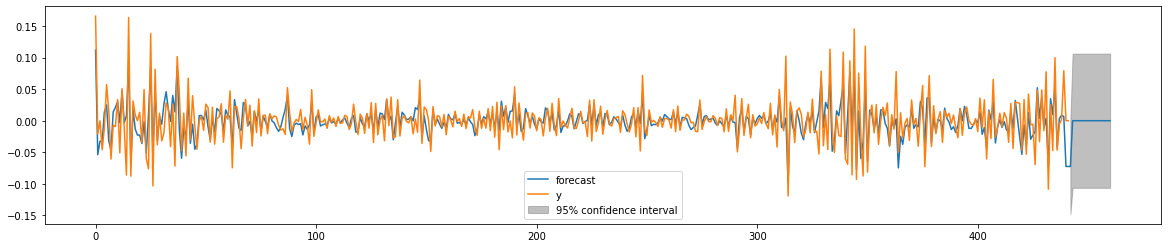

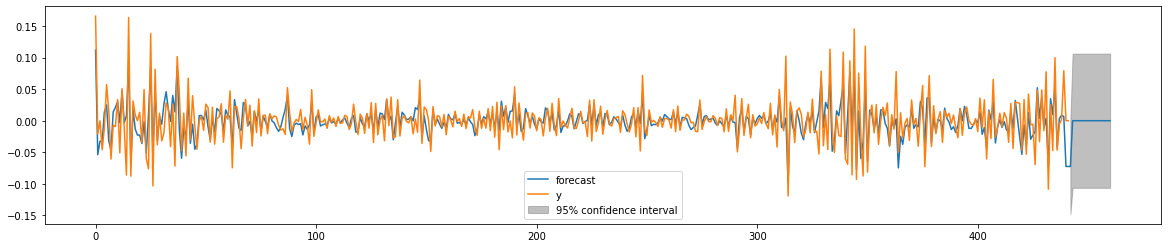

In [ ]:
from statsmodels.tsa.arima_model import ARMA

MA_Model = ARMA(np.asarray(d_trend),order = (0,1))
MA_fitted = MA_Model.fit()
MA_fitted.plot_predict(start = 5400,end = 5860)

## Forecasting

In [ ]:
theta = MA_fitted.params[1]
beta = theta/(1 + theta**2)

In [ ]:
d_trend.Delta2[5800]
[d_trend.Delta2[5800]]

[-0.017186550187873628]

In [ ]:
x = [d_trend.Delta2[5800]]
L = list()
for i in range(5800,len(d_trend)+1):
  x.append(beta*x[i - 5800])

x

[-0.017186550187873628,
 0.008593275081666676,
 -0.004296637534698269,
 0.0021483187642816,
 -0.0010741593806070327,
 0.0005370796895366327,
 -0.00026853984438487456,
 0.00013426992200071637,
 -6.713496090449773e-05,
 3.356748040431864e-05,
 -1.6783740178194207e-05,
 8.391870077114547e-06,
 -4.195935032565995e-06,
 2.0979675132873583e-06,
 -1.0489837551458596e-06,
 5.2449187682402e-07,
 -2.622459380375551e-07,
 1.311229688315501e-07,
 -6.556148432216133e-08,
 3.27807421142738e-08,
 -1.639037103373347e-08,
 8.19518550516502e-09,
 -4.097592746731652e-09,
 2.048796370440397e-09,
 -1.0243981837574841e-09,
 5.121990911473848e-10,
 -2.560995452080138e-10,
 1.280497724211676e-10,
 -6.402488611916415e-11,
 3.201244301387225e-11,
 -1.600622148408121e-11,
 8.003110730613149e-12,
 -4.001555359592846e-12,
 2.000777676939559e-12,
 -1.0003888370413474e-12,
 5.001944178064577e-13,
 -2.500972085461208e-13,
 1.250486040945064e-13,
 -6.25243019579762e-14,
 3.1262150934349596e-14,
 -1.5631075444855547e-1

## Best Linear Predictor

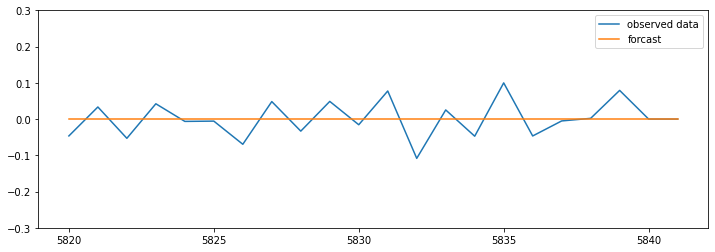

In [ ]:
plt.plot(np.arange(5820,d_trend.shape[0]),d_trend["Delta2"][5820:d_trend.shape[0]+1],label = "observed data")
plt.plot(np.arange(5820,d_trend.shape[0]),MA_Predict[-23:-1],label = "forcast")
plt.ylim((-0.3,0.3))
plt.legend()
plt.show()

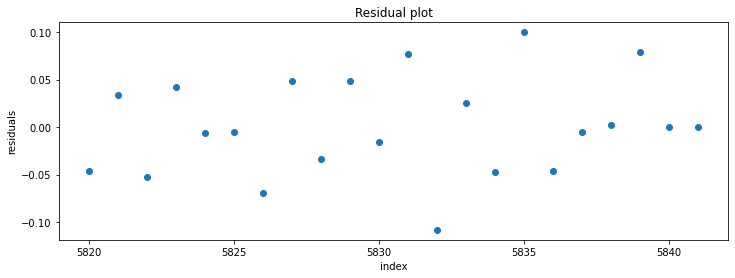

In [ ]:
res = d_trend["Delta2"][5820:d_trend.shape[0]+1] - MA_Predict[-23:-1]
plt.scatter(np.arange(5820,d_trend.shape[0]),res)
plt.title("Residual plot")
plt.xlabel("index")
plt.ylabel("residuals")
plt.show()

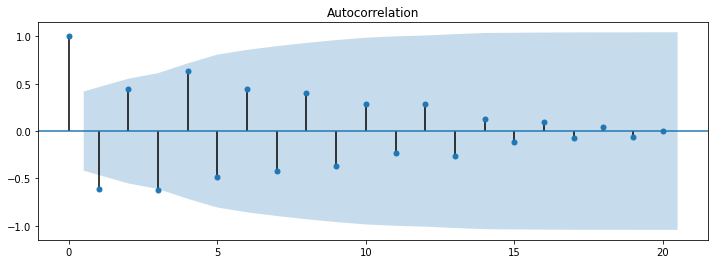

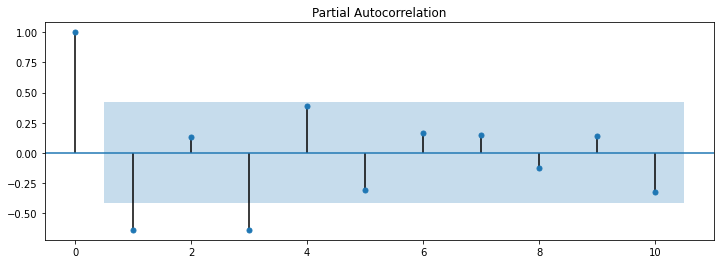

In [ ]:
import statsmodels.api as smp
res = pd.DataFrame(res)
smp.graphics.tsa.plot_acf(res,lags =20 )
smp.graphics.tsa.plot_pacf(res,lags =10 )
plt.show()
